# Conjugate gradients
---

* Conjugate gradient algorithm
* Optimality of CG

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import *
from numpy.random import *
from numpy.linalg import *

Consider a symmetric positive definite matrix $A=A^T \in \mathbb{R}^{m\times m}$. The conjugate gradient algorithm produces a solution $x$ of $Ax = b$ as follows:

**Algorithm: Conjugate gradients.**
We use the following variables:
* $x_n$: Approximate solution
* $\alpha$: Step length
* $p_n$: Search direction
* $\beta_n$: Iteration improvement
* $r_n$ residual

In [62]:
def conjugate_gradient(A, b, max_iter=None, tol=1e-8):
    m = shape(A)[0]
    x = zeros(n)
    r = b
    p = r
    
    if max_iter==None:
        max_iter=2*m
    
    residuals = zeros(max_iter)
    for k in range(max_iter):
        rlast = r
        
        Ap = A @ p
        α = (transpose(rlast) @ rlast) / (transpose(p) @ Ap) 
        x = x + (α * p)
        r = rlast - α*Ap
        β = (transpose(r) @ r) / (transpose(rlast) @ rlast)
        p = r + β * p
        
        if α < 0:
            raise ValueError('Matrix A is not SPD')
        
        residuals[k] = norm(r)
        if norm(r) <= tol:
            residuals = residuals[0:k]
            num_iterations = k+1
            return x, num_iterations, residuals

    raise RuntimeError('No convergence')

Text(0, 0.5, 'Residual norm $||r||_2$')

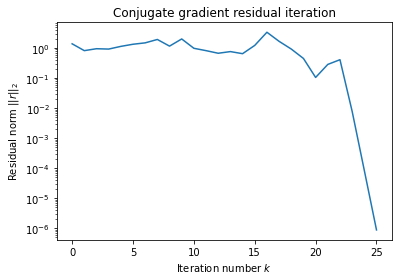

In [63]:
# Example:

B = rand(20,20)
A = transpose(B) @ B # Symmetric positive definite matrix
b = rand(20)

x, k, residuals = conjugate_gradient(A ,b)
plt.semilogy(residuals)
plt.title('Conjugate gradient residual iteration')
plt.xlabel(r'Iteration number $k$')
plt.ylabel(r'Residual norm $||r||_2$')

**Cost of conjugate gradient algorithm:**
* One nxn by n matrix vector multiplication
* 

**Proposition** For any $n \in \mathbb{N}$, the residual is given by $r_n = b - Ax_n$. This is easily shown via induction.

**Proposition** If $\varphi(x) = \frac{1}{2} x^T A x - b^T x$, then $ \nabla \varphi = Ax - b$, so the problem of finding the solution of $Ax = b$ becomes an optimization problem to find the minimum of $\varphi$.

**Theorem** Let $K_n = \textrm{span}\{b, Ab, \dots,  A^{n-1}b \}.$ If $r_{n-1} \neq 0$, then 
1. **(Krylov spaces)**: $\textrm{span}(x_1, \dots x_n) = \textrm{span}(p_0, \dots p_{n-1}) = \textrm{span}(r_0, \dots r_{n-1}) = K_n$,
2. **(Residuals are orthogonal)**: $r_n^T r_j = 0$, for $j=0, \dots, n-1$, and
3. **(Descent direction A-conjugacy)**: $p_n^T Ap_j = 0$, for $j=0, \dots, n-1$.



## Optimality of Conjugate Gradients
Define the A-norm $\|x\|_A = \sqrt{x^T Ax}$.

**Theorem** Let $x_*$ solve $Ax = b$. If $r_{n-1} \neq 0$, then 
$$
x_n = \underset{x \in K_n}{\textrm{argmin}} \{ \| x - x_* \|_A \}.
$$
So $x_n$ is basically the best approximation of the true solution in the Krylov space, as measured by the A-norm. Since the residuals are all mutually orthogonal, and the Krylov space is, eventually the Krylov space spans the whole space: $K_m = \mathbb{R}^m$. Therefore, we get the awesome corollary:

**Corollary** *The conjugate gradient algorithm theoretically converges to the exact solution in exactly $m$ steps.*

Proof: For any vector $x \in K_n$, we can write $x = x_n + \Delta x \in K_n$. Then
$$ x - x_*  = x_n - x_* + \Delta x = \Delta x - e_n $$ 
where $e_n = (x^* - x_n)$ is the error from the true solution. (Note that the residual is $A e_n = Ax^* - A x_n = b - A x_n$). Now, the difference in the A-norm becomes
$$
\begin{align}
    \|x - x_*\|_A^2 &= (x_n - x_* + \Delta x)^T A (x_n - x_* + \Delta x) \\
    &= (x^* - x_n)^T A (x^* - x_n) - 2(Ae_n)^T \Delta x + (\Delta x)^T A \Delta x
\end{align}
$$

But $Ae_n = Ae_n = Ab - x_n = r_n$, which is perpendicular to the Krylov space $K_n$ as given by (2). Since $\Delta x \in K_n$, we get that $(Ae_n)^T \Delta x = r_n^T \Delta x = 0$. Therefore, 
$$
\|x - x_*\|_A^2 = e_n^T A e_n + (\Delta x)^T A (\Delta x) = e_n^T A e_n + \|\Delta x\|_A \geq e_n^T A e_n,
$$
with equality when $\Delta x = 0$.

## Convergence rate of CG

Consider $\varphi(x) = \frac{1}{2} x^T A x - b^T x$, where we then have $ \nabla \varphi = Ax - b$.
Then $\|x_n - x^*\|_A^2 = 2\varphi(x_n) + const(x^*)$, so $\varphi$ is also minimized on $K_n$ by $x=x_n$.

**Theorem** Let $A = A^T$ be a SPD matrix. Let $P_n = \{ \textrm{polynomials with degree} \leq n \textrm{ with } p(0)=1\}$. Then 
$$
\frac{\|e_n\|_A}{\|e_0\|_A} = \min_{p \in P_n} \frac{\|p(A)e_0\|_A}{\|e_0\|_A} \leq \min_{p\in P_n} \left(\max_{\lambda \in \textrm{eig}(A)} |p(\lambda)| \right).
$$

<!--- 
    Proof: We know $e_0 = x^* - x_0 = A^{-1}b$ and $x_n \in K_n$, so $x_n = \pi_{n-1}(A)b$ for some polynomial $\pi_{n-1}$ of degree $n-1$.

    Therefore, 
    $$
    \begin{align}
    e_n &= x_* - x_n \\
    &= e_0 - \pi_{n-1}(A)A e_0 \\
    &= p(A)e_0
    \end{align}
    $$
    where $p \in P_n$ is given by $p(\lambda) = 1 - \alpha_0 \lambda - \dots \alpha_{n-1} \lambda^{n-1}$

    The minimization given in the first equality is just a result of the fact that $x_n$ minimizes $e_n$ as measured in the $A$-norm.

    Now, for the inequality: Let A = $V \Lambda V^T$ be the orthogonal diagonalization of A, where $\Lambda = \textrm{diag}(\lambda_i)$. Then 
    $$\begin{align}
    p(A) &= I -\alpha_0 V \Lambda V^T - \dots \\
    &= Vp(\Lambda) V^T.
    \end{align}$$

    Let $e_0 = Vy = \sum y_j v_j$, where $v_j$ are the eigenvectors of A.
    Then $\|e_0\|_A^2 = y^t V^T (V \Lambda V^T) V_y = y^T \Lambda y = \sum \lambda_j y_j^2$

    We get 
$\|p(A) e_0\|_A^2 = y^T p(\Lambda) \Lambda p(\Lambda)y = \sum \lambda_j p(\lambda_j)^2 y_j^2 $
--->

A massively important corollary:

**Corollary 1** If A has $n \leq m$ DISTINCT eigenvalues $\mu_1 = \lambda_1, \dots \mu_n = \lambda_n$, then CG terminates with $x_n = x_*$ in $n$ steps.

So if we have a 100,000x100,000 SPD matrix with only 5 distinct eigenvalues, then CG will converge in 5 steps!

*Proof:* Let $\tilde{p}(\lambda) = \prod_{i=1}^n (1 - \frac{\lambda}{\mu_j}) \in P_n$. Then $\tilde{p}(\mu_j) = 0$ for $j=1 \dots n$.

Therefore, 
$$
\frac{\|e_n \|_A}{\|e_0 \|_A} \leq \min_{p\in P_n} \left(\max_{\mu_j \in \textrm{eig}(A)} |p(\mu_j)| \right) = |\tilde{p}(\mu_j)| = 0.
$$

**Corollary 2** (Convergence bound). Suppose $\textrm{cond}(A) = \frac{\lambda_1}{\lambda_2} = \kappa$. Then
$$ 
\frac{\|e_n \|_A}{\|e_0 \|_A} \leq 2 \left( \frac{\sqrt{\kappa} - 1}{\sqrt{\kappa} + 1} \right)^n
$$

This is much better than the convergence bound for "gradient descent" algorithm: $\left( \frac{{\kappa} - 1}{{\kappa} + 1} \right)^n$.

Proof uses Chebyshev polynomials, and we didn't discuss it.

## Preconditioning
Let $M = M^T > 0$ be SPD. Consider $M^{-1/2}AM^{-1/2}M^{1/2}x = M^{-1/2}b$. This has the same solution as $Ax = b$, but we've modified it into an equation of the form $\tilde{A} \tilde{x} = \tilde{b}$ where $\tilde{A} = M^{-1/2}AM^{-1/2}$, $\tilde{x} = M^{1/2} x$, and $\tilde{B} = M^{-1/2}b$. Note that we need to take square roots of matrices $M$: for example, $M$ can be a diagonal matrix.

However, if $\textrm{cond}(\tilde{A}) << \textrm{cond}(A)$, then we end up getting much quicker convergence, which is awesome. This process is called conditioning.

